# Mental Stress Classification

In [1]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("train.csv")

In [3]:
df2=pd.read_csv("test.csv")

In [4]:
df1.shape

(2838, 9)

In [5]:
df2.shape

(715, 9)

In [6]:
df1.sample()

,post_id,sentence_range,text,id,label,social_timestamp,social_karma,social_upvote_ratio,social_num_comments
483,7oia47,"[0, 5]",Haven't felt this excited about someone since ...,1547,0,1515230037,2,0.54,14


In [7]:
df2.sample()

,id,post_id,sentence_range,text,label,social_timestamp,social_karma,social_upvote_ratio,social_num_comments
225,1304,77mvd7,"[20, 25]",Now they didn't know about HF autism then but ...,1,1508513786,6,1.0,4


In [8]:
# We merged the two files. We have completed the missing data.
df = pd.concat([df1, df2])

In [9]:
df.shape

(3553, 9)

In [10]:
df.head()

,post_id,sentence_range,text,id,label,social_timestamp,social_karma,social_upvote_ratio,social_num_comments
0,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,1521614353,5,0.86,1
1,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1527009817,4,0.65,2
2,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,1535935605,2,0.67,0
3,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,1516429555,0,0.50,5
4,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,1539809005,24,1.00,1


In [11]:
df.columns

Index(['post_id', 'sentence_range', 'text', 'id', 'label', 'social_timestamp',
       'social_karma', 'social_upvote_ratio', 'social_num_comments'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3553 entries, 0 to 714
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_id              3553 non-null   object 
 1   sentence_range       3553 non-null   object 
 2   text                 3553 non-null   object 
 3   id                   3553 non-null   int64  
 4   label                3553 non-null   int64  
 5   social_timestamp     3553 non-null   int64  
 6   social_karma         3553 non-null   int64  
 7   social_upvote_ratio  3553 non-null   float64
 8   social_num_comments  3553 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 277.6+ KB


In [13]:
df.isnull().sum()

post_id                0
sentence_range         0
text                   0
id                     0
label                  0
social_timestamp       0
social_karma           0
social_upvote_ratio    0
social_num_comments    0
dtype: int64

In [14]:
df3=df[["text"]]

In [15]:
df3.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


**Data Preprocessing Start**

In [16]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [17]:
stopwords = set(stopwords.words("english"))

In [18]:
#we clean up unnecessary marks
def clean(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove text enclosed in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs starting with 'http://' or 'https://' and 'www.'
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove any HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)

    # Tokenize the text, remove stopwords, and join the words back into a string
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)

    # Perform stemming on the words
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text

df3["text"] = df3["text"].apply(clean)

In [19]:
df3["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df3=df3[["text", "label"]]

In [20]:
df3.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [21]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

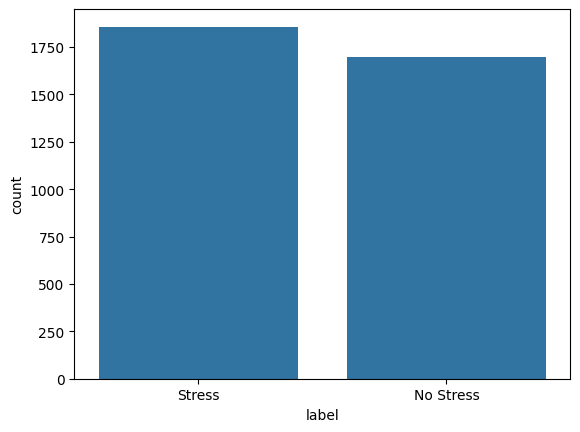

In [22]:
sns.countplot(x=df3.label)

**Data Splitting**

In [23]:
x=df3.text
y=df3.label
df3.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
# CountVectorizer is a class in scikit-learn used for converting text data into a numerical representation. It works by creating a "bag of words" model, where each document (or text) is represented as a vector of word frequencies.
vect=CountVectorizer(stop_words="english")

In [26]:
x=vect.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

**Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [29]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
pred1=d.predict(x_test)

In [31]:
ac1 = accuracy_score(y_test,pred1)
ac1

0.6175478065241845

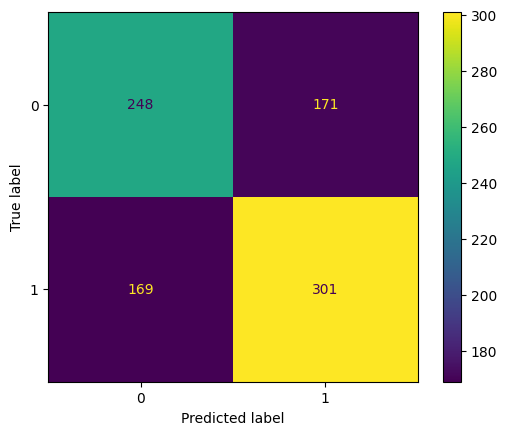

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(y_test, pred1)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()

**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
pred2 = rf.predict(x_test)

In [36]:
ac2 = accuracy_score(y_test, pred2)
ac2 

0.7446569178852643

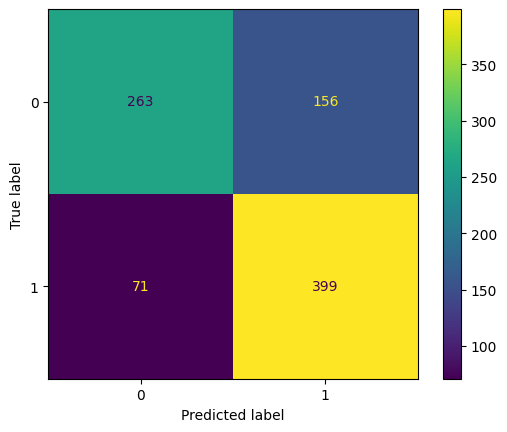

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(y_test, pred2)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()

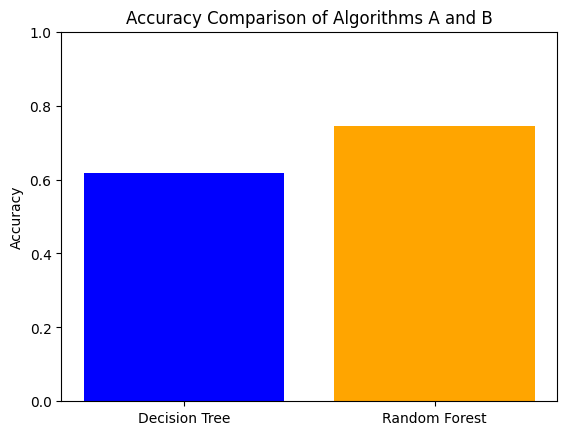

In [38]:
algorithms = ['Decision Tree', 'Random Forest']
accuracies = [ac1, ac2]

plt.bar(algorithms, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Algorithms A and B')
plt.ylim(0, 1)  
plt.show()

### Model Testing:

In [39]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [40]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [41]:
user="Today I conducted a workshop for 2 hours returned home and started working on my project. I am feeling very tired. I am not able to concentrate on my work. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything."

In [42]:
user = preprocess_text(user)

In [43]:
df4=vect.transform([user]).toarray()
output=rf.predict(df4)
print(output)

['Stress']


**Code to get first post caption of user to predict**

In [44]:
# This line imports the instaloader library, which is used to interact with Instagram profiles and retrieve data from them
# import instaloader

In [45]:
# def get_first_post_caption(username):
#     L = instaloader.Instaloader()

#     try:
#         profile = instaloader.Profile.from_username(L.context, username)
#         posts = profile.get_posts()

#         for post in posts:
#             caption = post.caption
#             if caption:
#                 return caption

#     except Exception as e:
#         print(f"Error: {e}")
#         return None

# if __name__ == "__main__":
#     username = input("Enter the Instagram username: ")
#     caption = get_first_post_caption(username)

#     if caption:
#         preprocessed = preprocess_text(caption)
#         inp=vect.transform([preprocessed]).toarray()
#         output=rf.predict(inp)
#         print(output)
#     else:
#         print("Unable to retrieve the caption.")

JSON Query to api/v1/users/web_profile_info/?username=: 404 Not Found [retrying; skip with ^C]
JSON Query to api/v1/users/web_profile_info/?username=: 404 Not Found [retrying; skip with ^C]
JSON Query to web/search/topsearch/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to web/search/topsearch/: HTTP error code 401. [retrying; skip with ^C]


Error: JSON Query to web/search/topsearch/: HTTP error code 401.
Unable to retrieve the caption.
